In [13]:
import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize

In [14]:
data = pd.DataFrame({
    'target': [0, 4, 2],
    'ids': [1, 2, 3],
    'date': ["2023-07-21", "2023-07-22", "2023-07-23"],
    'flag': ['NO_QUERY', 'NO_QUERY', 'NO_QUERY'],
    'user': ['user1', 'user2', 'user3'],
    'text': ["I love this product!", "This is the worst thing ever.", "It's okay, not great."]
})

# Text preprocessing

In [15]:
def preprocess_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text) 
    text = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(text)  
    return ' '.join(tokens)

In [16]:
data['cleaned_text'] = data['text'].apply(preprocess_text)

# Sentiment analysis using NLP techniques

### Using VADER

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [19]:
sid = SentimentIntensityAnalyzer()

In [20]:
def get_vader_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [21]:
data['vader_sentiment'] = data['cleaned_text'].apply(get_vader_sentiment)

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

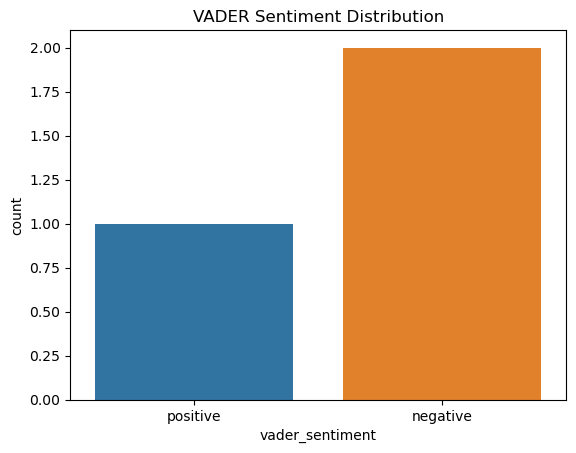

In [23]:
sns.countplot(x='vader_sentiment', data=data)
plt.title('VADER Sentiment Distribution')
plt.show()